- [Chapter2 Exercise8](#Chapter2-Exercise8)
- [Chapter2 Exercise10](#Chapter2-Exercise10)
- [Chapter3 Exercise8](#Chapter3-Exercise8)
- [Chapter3 Exercise9](#Chapter3-Exercise9)
- [Additional coding task](#Additional-coding-task)

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import seaborn as sns
import ISLP
from ISLP.models import(ModelSpec as MS,summarize,poly)

### Chapter2 Exercise8

We load the dataset 'College' and follow the commands which are shown in the textbook and have a better understanding of the data processing ways.

In [2]:
college=pd.read_csv('College.csv')
college2=pd.read_csv('College.csv',index_col=0)
college3=college.rename({'Unnamed: 0':'College'},axis=1)
college3=college3.set_index('College')
college=college3
college

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49


In [3]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


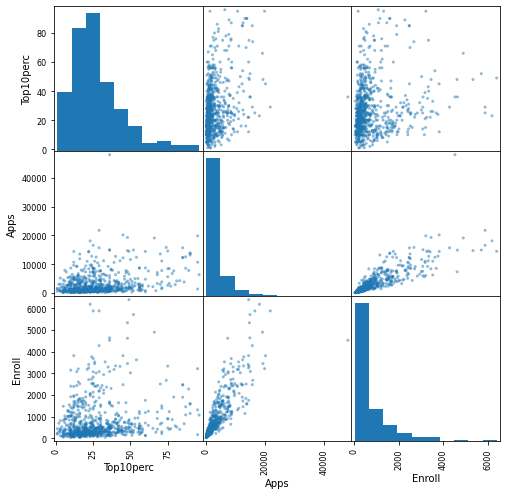

In [4]:
#Draw the scatter matrix of the columns
data1=college[['Top10perc','Apps','Enroll']]
pd.plotting.scatter_matrix(data1,figsize=(8,8))
plt.show()

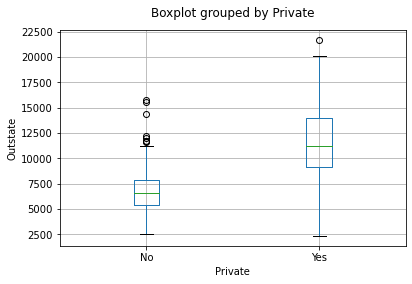

In [5]:
#Draw the boxplot of Oustate versus Private
fig,ax=subplots()
data2=college[['Outstate','Private']]
data2.boxplot(column='Outstate',by='Private',ax=ax)
ax.set_xlabel('Private')
ax.set_ylabel('Outstate')
ax.set_title('')
plt.show()

(f)There are 699 'No' and 78 'Yes' in the column 'Elite' which divides the 'Top10perc' variable into two groups. And we draw the boxplot to produce side-by-side boxplots of Outstate versus Elite.

In [6]:
college['Elite']=pd.cut(college['Top10perc'],[0,50,100],labels=['No','Yes'])
college['Elite'].value_counts()

No     699
Yes     78
Name: Elite, dtype: int64

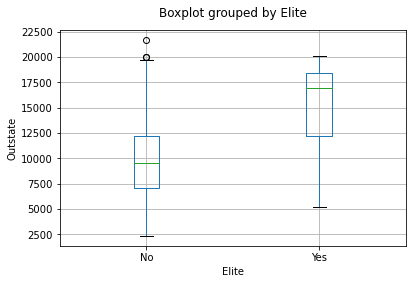

In [7]:
#Draw the boxplot of Oustate versus Elite
fig,ax=subplots()
data2=college[['Outstate','Elite']]
data2.boxplot(column='Outstate',by='Elite',ax=ax)
ax.set_xlabel('Elite')
ax.set_ylabel('Outstate')
ax.set_title('')
plt.show()

(g)We draw some histograms with differing numbers of bins for a few of the quantitative variables.

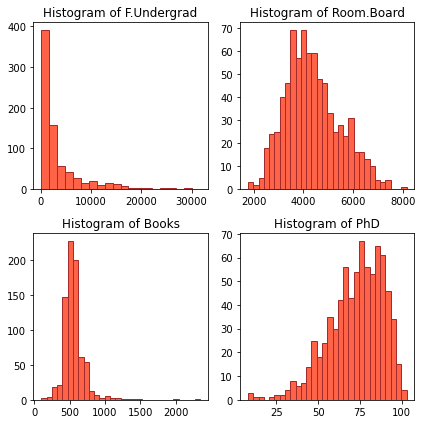

In [8]:
fig,axes=subplots(2,2,figsize=(6,6))
axes[0,0].hist(college['F.Undergrad'],bins=20,color='tomato',edgecolor='brown')
axes[0,0].set_title('Histogram of F.Undergrad')
axes[0,1].hist(college['Room.Board'],bins=30,color='tomato',edgecolor='brown')
axes[0,1].set_title('Histogram of Room.Board')
axes[1,0].hist(college['Books'],bins=30,color='tomato',edgecolor='brown')
axes[1,0].set_title('Histogram of Books')
axes[1,1].hist(college['PhD'],bins=30,color='tomato',edgecolor='brown')
axes[1,1].set_title('Histogram of PhD')
plt.tight_layout()
plt.show()

(h)We continue exploring the data and find that in terms of these two variables 'Books' and 'Personal', the public colleges have more stable data than the private colleges. Besides, only private colleges have the highest estimated book costs or highest estimated personal spending. 

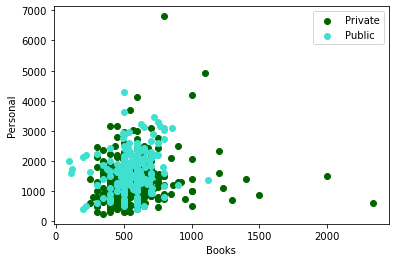

In [9]:
#Draw the scatterplot based on the categories of Private
category=college['Private']
category=category.map({'Yes':1,'No':0})
x=college['Books']
y=college['Personal']
plt.scatter(x[category==1], y[category==1], color='darkgreen', label='Private')
plt.scatter(x[category==0], y[category==0], color='turquoise', label='Public')
plt.xlabel('Books')
plt.ylabel('Personal')
plt.legend()
plt.show()

### Chapter2 Exercise10

In [10]:
boston=ISLP.load_data('boston')
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


(b)The Boston housing dataset has overall 506 rows and 13 columns, which represent 13 factors including 12 feature variables and 1 target variable. And rows indicate that the dataset has 506 observation and each columns has relevant explanation which has a impact on the housing price excepet column 'medv'.

(c)From the image shown below, we can find the relationship between the housing price factor ‘medv’ and other predictors. In terms of the factor ‘lstat’, we learn that the median housing price will increase when proportion of low status decreases so these two factors have a negative correlation. Besides, the predictor ‘rm’ has a positive correlation with the median housing price because when the average number of rooms in a house increases, the price will increase as well.

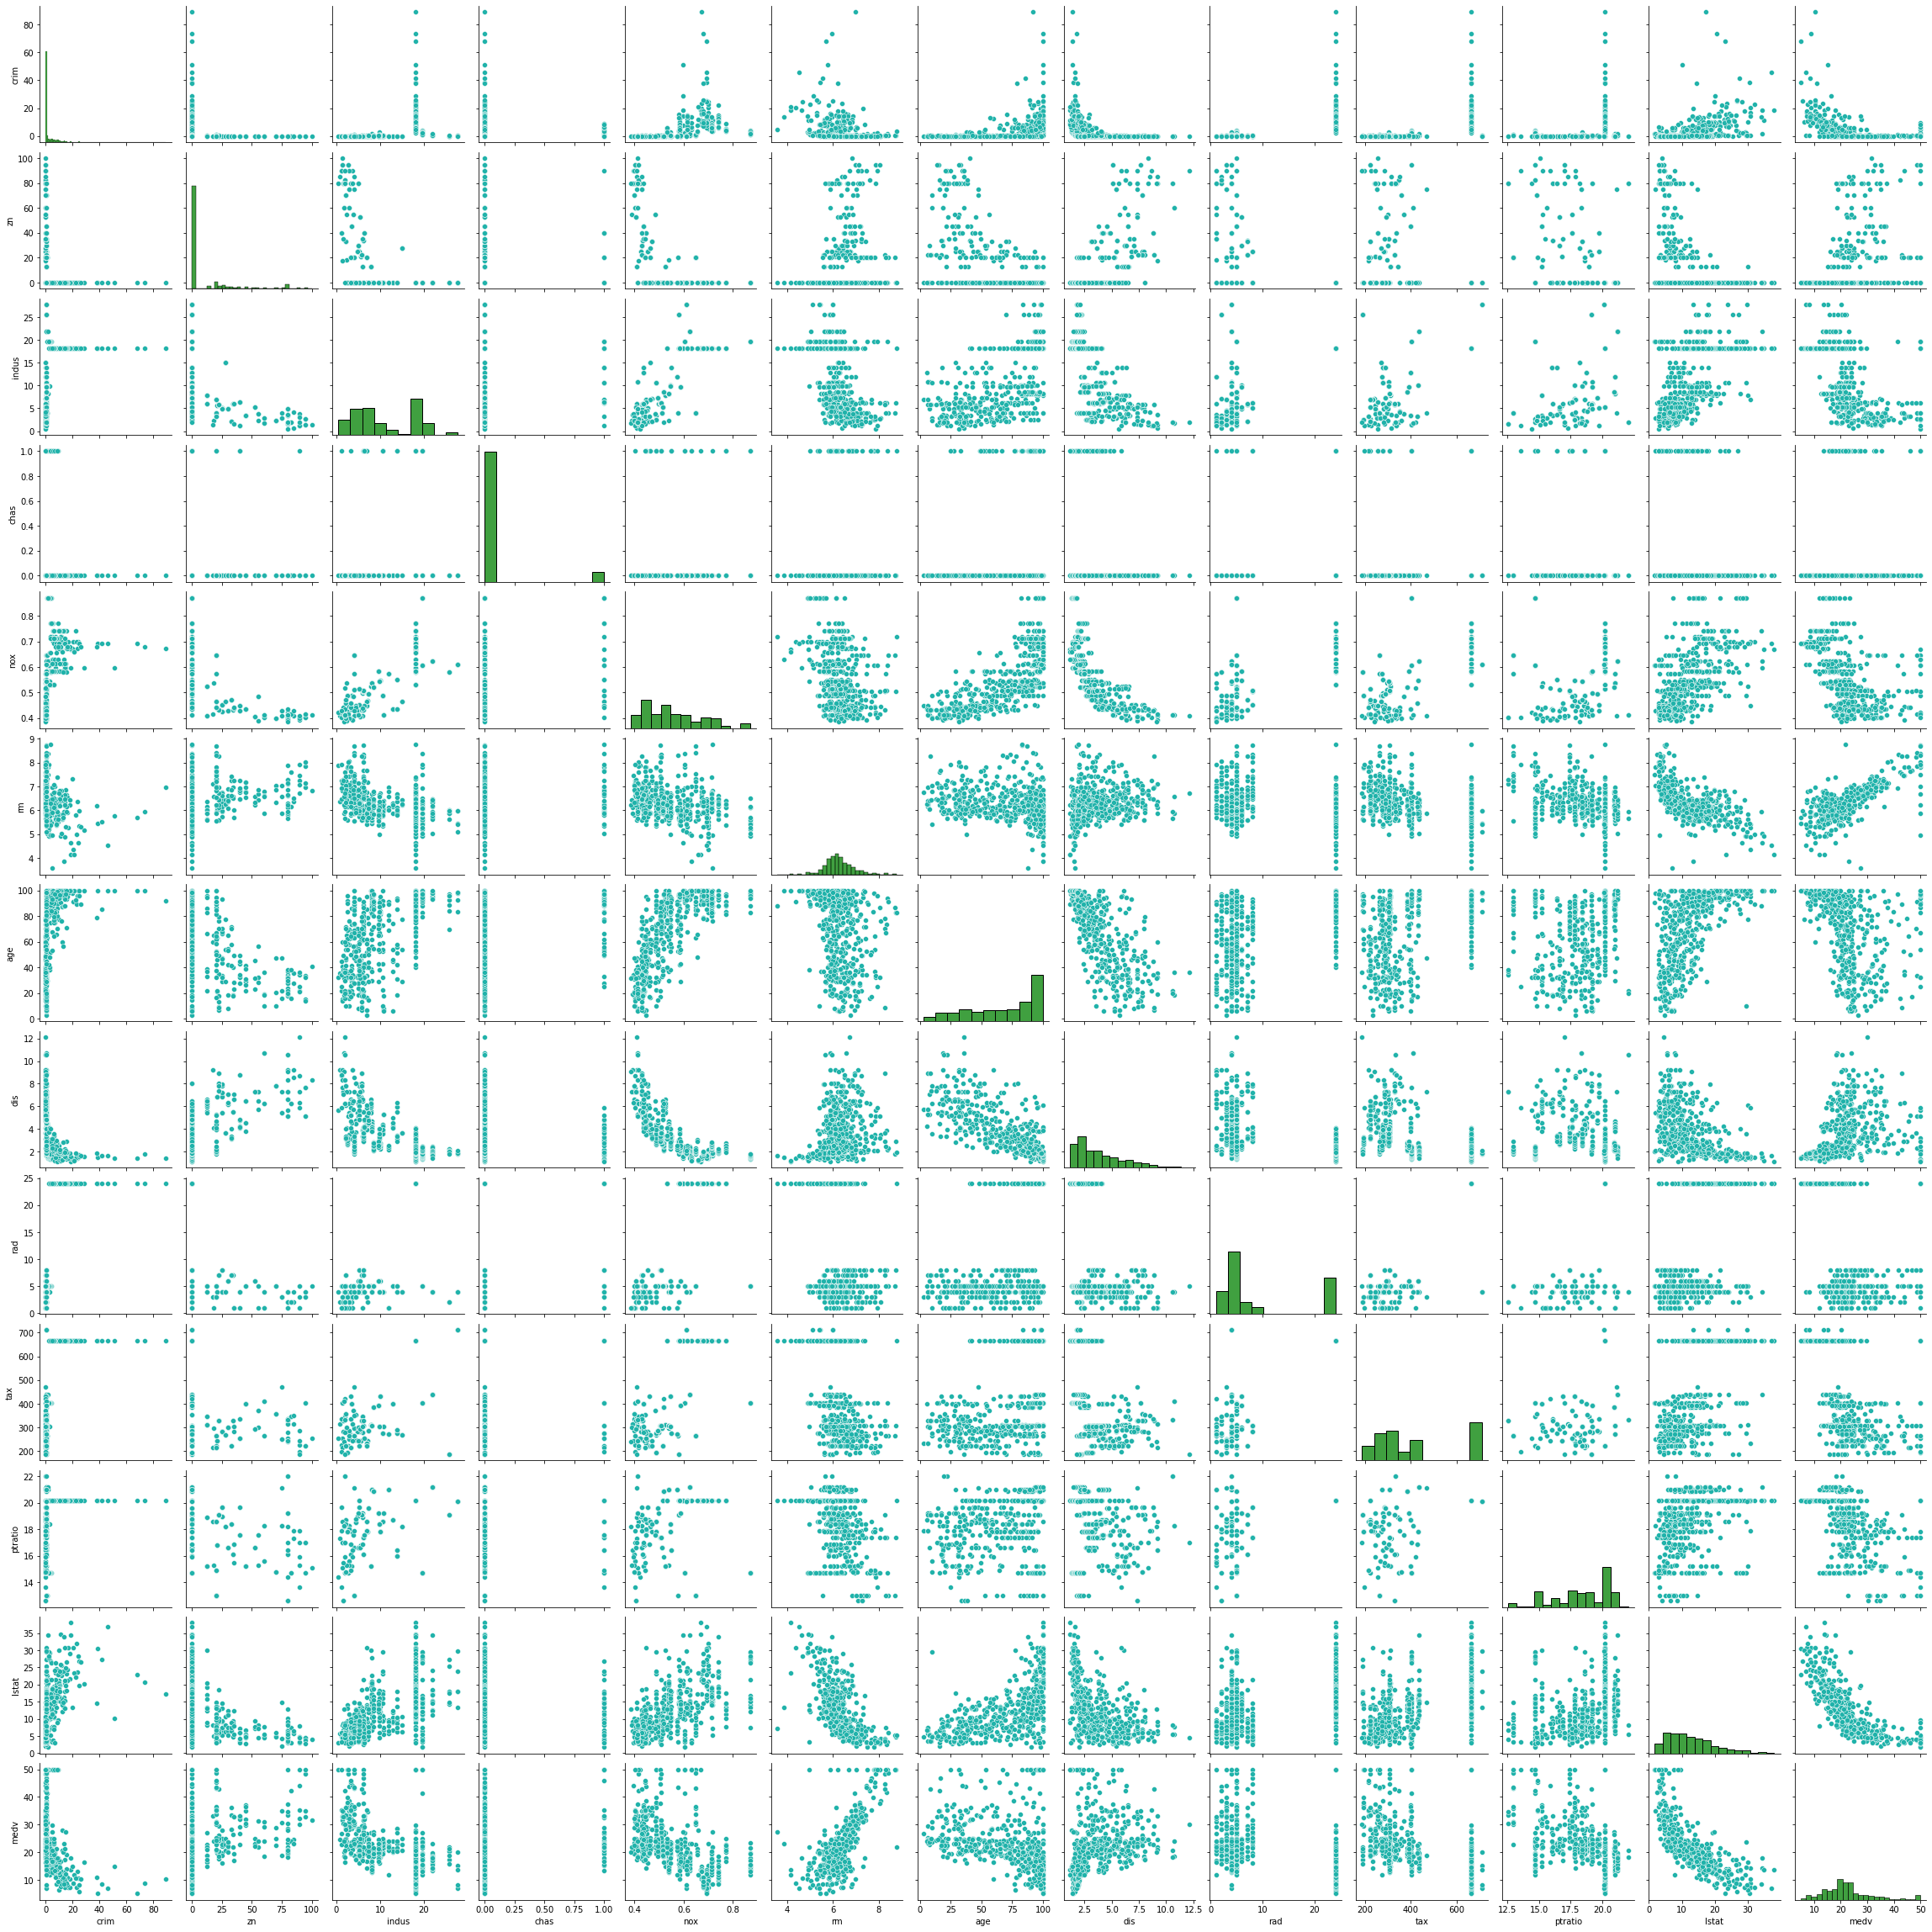

In [11]:
scatter_matrix=sns.pairplot(boston,diag_kws={'color':'green'},plot_kws={'color':'lightseagreen'})
scatter_matrix.savefig('scatter_matrix.png')
plt.show()

(d)In order to find out the relationship between per capita crime rate and other predictors, we compute the correlation coefficients and the p-values.

In [12]:
target=boston[['crim']].values.flatten()
results=[]
for idx, column in enumerate(boston.columns[1:]):
    data=boston[column].values.flatten()
    correlation,p_value=stats.pearsonr(target,data)
    results.append((idx,correlation,p_value))
for result in results:
    print(f"Column:{result[0]}\tCorrelation:{result[1]}\tp-value:{result[2]}")

Column:0	Correlation:-0.20046921966254727	p-value:5.5064721076793215e-06
Column:1	Correlation:0.4065834114062596	p-value:1.4503489330271558e-21
Column:2	Correlation:-0.05589158222224159	p-value:0.20943450153519902
Column:3	Correlation:0.4209717113924563	p-value:3.75173926035719e-23
Column:4	Correlation:-0.21924670286251394	p-value:6.346702984687723e-07
Column:5	Correlation:0.3527342509013639	p-value:2.854869350244199e-16
Column:6	Correlation:-0.3796700869510245	p-value:8.519948766926072e-19
Column:7	Correlation:0.6255051452626019	p-value:2.693844398186529e-56
Column:8	Correlation:0.5827643120325847	p-value:2.3571268352569847e-47
Column:9	Correlation:0.2899455792795199	p-value:2.942922447360171e-11
Column:10	Correlation:0.4556214794479463	p-value:2.6542772314732534e-27
Column:11	Correlation:-0.3883046085868116	p-value:1.1739870821943778e-19


(e)We find the suburbs have high crime rates, tax rates and pupil-teacher ratios.

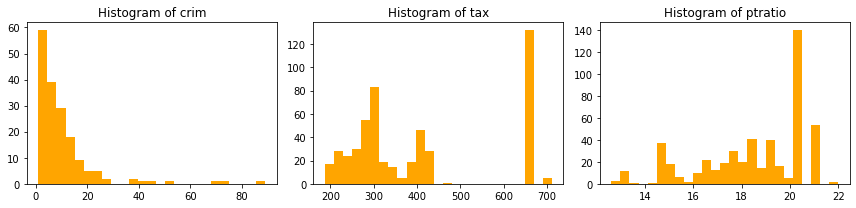

In [13]:
fig,axes=plt.subplots(1,3,figsize=(12,3))
axes[0].hist(boston['crim'][boston['crim']>1],bins=25,color='orange')
axes[0].set_title('Histogram of crim')
axes[1].hist(boston['tax'],bins=25,color='orange')
axes[1].set_title('Histogram of tax')
axes[2].hist(boston['ptratio'],bins=25,color='orange')
axes[2].set_title('Histogram of ptratio')
plt.tight_layout()
plt.show()

(f)There are 35 suburbs in this data set bound the Charles river.

In [14]:
len(boston[boston['chas']==1])

35

(g)The median pupil-teacher ratio among the towns is 19.05.

In [15]:
boston['ptratio'].median()

19.05

(h)If we look at the median row of each column as sample 2, we can compare the two samples to get: The first sample had a very low crime rate (0.00632), while the second sample had a high crime rate (0.25651). The first sample had a ratio of residential land over 25,000 square feet (ZN) of 18, while the second sample had a ratio of 0, meaning no residential land above that threshold. The higher the median value of an owner-occupied home, the lower the area's crime rate and the higher the housing conversion rate.

In [16]:
data1 = boston.copy()
data1.sort_values(by = 'medv')
temp = data1.iloc[0,:]
print(temp)
mid = boston.median()
print(mid)

crim         0.00632
zn          18.00000
indus        2.31000
chas         0.00000
nox          0.53800
rm           6.57500
age         65.20000
dis          4.09000
rad          1.00000
tax        296.00000
ptratio     15.30000
lstat        4.98000
medv        24.00000
Name: 0, dtype: float64
crim         0.25651
zn           0.00000
indus        9.69000
chas         0.00000
nox          0.53800
rm           6.20850
age         77.50000
dis          3.20745
rad          5.00000
tax        330.00000
ptratio     19.05000
lstat       11.36000
medv        21.20000
dtype: float64


(i)There are 64 suburbs average more than seven rooms per dwelling and 13 suburbs average more than eight rooms per dwelling. The rooms reflect the higher median value of owner-occupied homes on the one hand, but also the rising crime rate on the other hand.

In [17]:
print(boston[boston['rm']>7])
print(boston[boston['rm']>8])

cd = boston[boston['rm']>8].copy()
mid1 = cd.median()
mid2 = boston.median()
print(mid1)
print(mid2)

         crim    zn  indus  chas     nox     rm   age     dis  rad  tax  \
2     0.02729   0.0   7.07     0  0.4690  7.185  61.1  4.9671    2  242   
4     0.06905   0.0   2.18     0  0.4580  7.147  54.2  6.0622    3  222   
40    0.03359  75.0   2.95     0  0.4280  7.024  15.8  5.4011    3  252   
55    0.01311  90.0   1.22     0  0.4030  7.249  21.9  8.6966    5  226   
64    0.01951  17.5   1.38     0  0.4161  7.104  59.5  9.2229    3  216   
..        ...   ...    ...   ...     ...    ...   ...     ...  ...  ...   
364   3.47428   0.0  18.10     1  0.7180  8.780  82.9  1.9047   24  666   
370   6.53876   0.0  18.10     1  0.6310  7.016  97.5  1.2024   24  666   
375  19.60910   0.0  18.10     0  0.6710  7.313  97.9  1.3163   24  666   
453   8.24809   0.0  18.10     0  0.7130  7.393  99.3  2.4527   24  666   
482   5.73116   0.0  18.10     0  0.5320  7.061  77.0  3.4106   24  666   

     ptratio  lstat  medv  
2       17.8   4.03  34.7  
4       18.7   5.33  36.2  
40      18.3   

### Chapter3 Exercise8

(a)We import the package ISLP to load the dataset ‘Auto’ and perform a simple linear regression with mpg as the response and horsepower as the predictor.

In [18]:
auto=ISLP.load_data('auto')
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


(i)According to the model’s summary, we can find that the p-values of coefficients in this linear regression are close to 0, which means the statistical significance, so there is a linear relationship between the predictor ‘horsepower’ and the response 'mpg'.


(ii)The R-squared is 0.606, indicating that almost 60.6% of the variation in the response can be explained by the predictor in this simple linear regression model.

(iii)Since the coefficient of the predictor is negative (-0.1578), the relationship between the predictor and the response is negative.

In [19]:
predictor=auto['horsepower']
target=auto['mpg']
#add the intercept
x=sm.add_constant(predictor)
model=sm.OLS(target,x)
result=model.fit()
#print(result.summary())
summarize(result)

,coef,std err,t,P>|t|
const,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


(iv)We can obtain the associated 95% confidence and predicted intervals.

In [20]:
x0=[1,98]
#Calculate confidence interval
confidence_interval=result.conf_int(alpha=0.05)
lower_ci=confidence_interval.loc['const',0]+confidence_interval.loc['horsepower',0]*x0[1]
upper_ci=confidence_interval.loc['const',1]+confidence_interval.loc['horsepower',1]*x0[1]
print('置信区间：',(lower_ci,upper_ci))

置信区间： (21.81454495972265, 27.11960934530221)


In [21]:
#Calculate prediction interval
prediction_interval=result.get_prediction(exog=x0).conf_int(alpha=0.05)
lower_pi=prediction_interval[0][0]
upper_pi=prediction_interval[0][1]
print('预测区间：',(lower_pi,upper_pi))

预测区间： (23.97307896070394, 24.961075344320914)


(b)We plot the response and the prediction in a new set of axes and use the ax.axline() method to display the least squares regression line. (green points are scatters of the data and the blue line refer to the simple linear regression model)

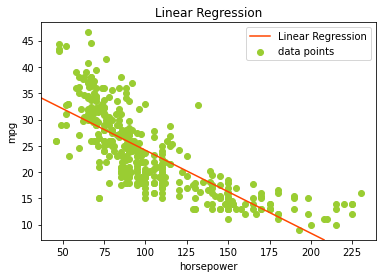

In [22]:
#Draw the least squares regression line 
beta_0=result.params[0]
beta_1=result.params[1]
fig,ax=plt.subplots()
ax.scatter(predictor,target,color='yellowgreen',label='data points')
line=ax.axline(xy1=(np.min(predictor),beta_1*np.min(predictor)+beta_0),slope=beta_1,color='orangered',label='Linear Regression')
ax.legend()
ax.set_xlabel('horsepower')
ax.set_ylabel('mpg')
ax.set_title('Linear Regression')
plt.savefig('Linear Regression.png')
plt.show()

(c)We examine some diagnostic plots and draw the plot of residuals versus fitted values for the Auto data set which shows the linear regression of mpg on horsepower. The red line is a smooth fit to the residuals intended to make it easier to identify the trend.

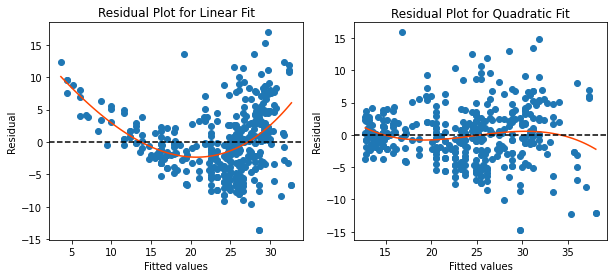

In [23]:
fig,axes=plt.subplots(1,2,figsize=(10,4))
x=result.fittedvalues
y=result.resid
axes[0].scatter(x,y)
#Draw the line of smooth fit to the residuals
#Use cubic polynomials to fit residuals
p=np.polyfit(x, y,deg=3)
x_f=np.linspace(min(x),max(x),num=100)
y_f=np.polyval(p,x_f)
axes[0].plot(x_f,y_f,color='orangered')
axes[0].set_xlabel('Fitted values')
axes[0].set_ylabel('Residual')
axes[0].set_title('Residual Plot for Linear Fit')
axes[0].axhline(0,c='k',ls='--')
##
#Quadratic fit of mpg on horsepower
auto['horsepower_squared']=auto['horsepower']**2
predictor_2=auto[['horsepower','horsepower_squared']]
target=auto['mpg']
#Add the intercept
predictor_2=sm.add_constant(predictor_2)
model_2=sm.OLS(target,predictor_2)
result_2=model_2.fit()
x_2=result_2.fittedvalues
y_2=result_2.resid
axes[1].scatter(x_2,y_2)
#Draw the line of smooth fit to the residuals
#Use cubic polynomials to fit residuals
p_2=np.polyfit(x_2, y_2,deg=3)
x_f_2=np.linspace(min(x_2),max(x_2),num=100)
y_f_2=np.polyval(p_2,x_f_2)
axes[1].plot(x_f_2,y_f_2,color='orangered')
axes[1].set_xlabel('Fitted values')
axes[1].set_ylabel('Residual')
axes[1].set_title('Residual Plot for Quadratic Fit')
axes[1].axhline(0,c='k',ls='--');

In the left panel of the figure, the residuals exhibit a clear U-shape, which indicates that the data is non-linear and the right-hand panel of the figure displays the model containing a quadratic term. There appears to be little pattern in the residuals, suggesting that the quadratic term improves the fit to the data.

### Chapter3 Exercise9

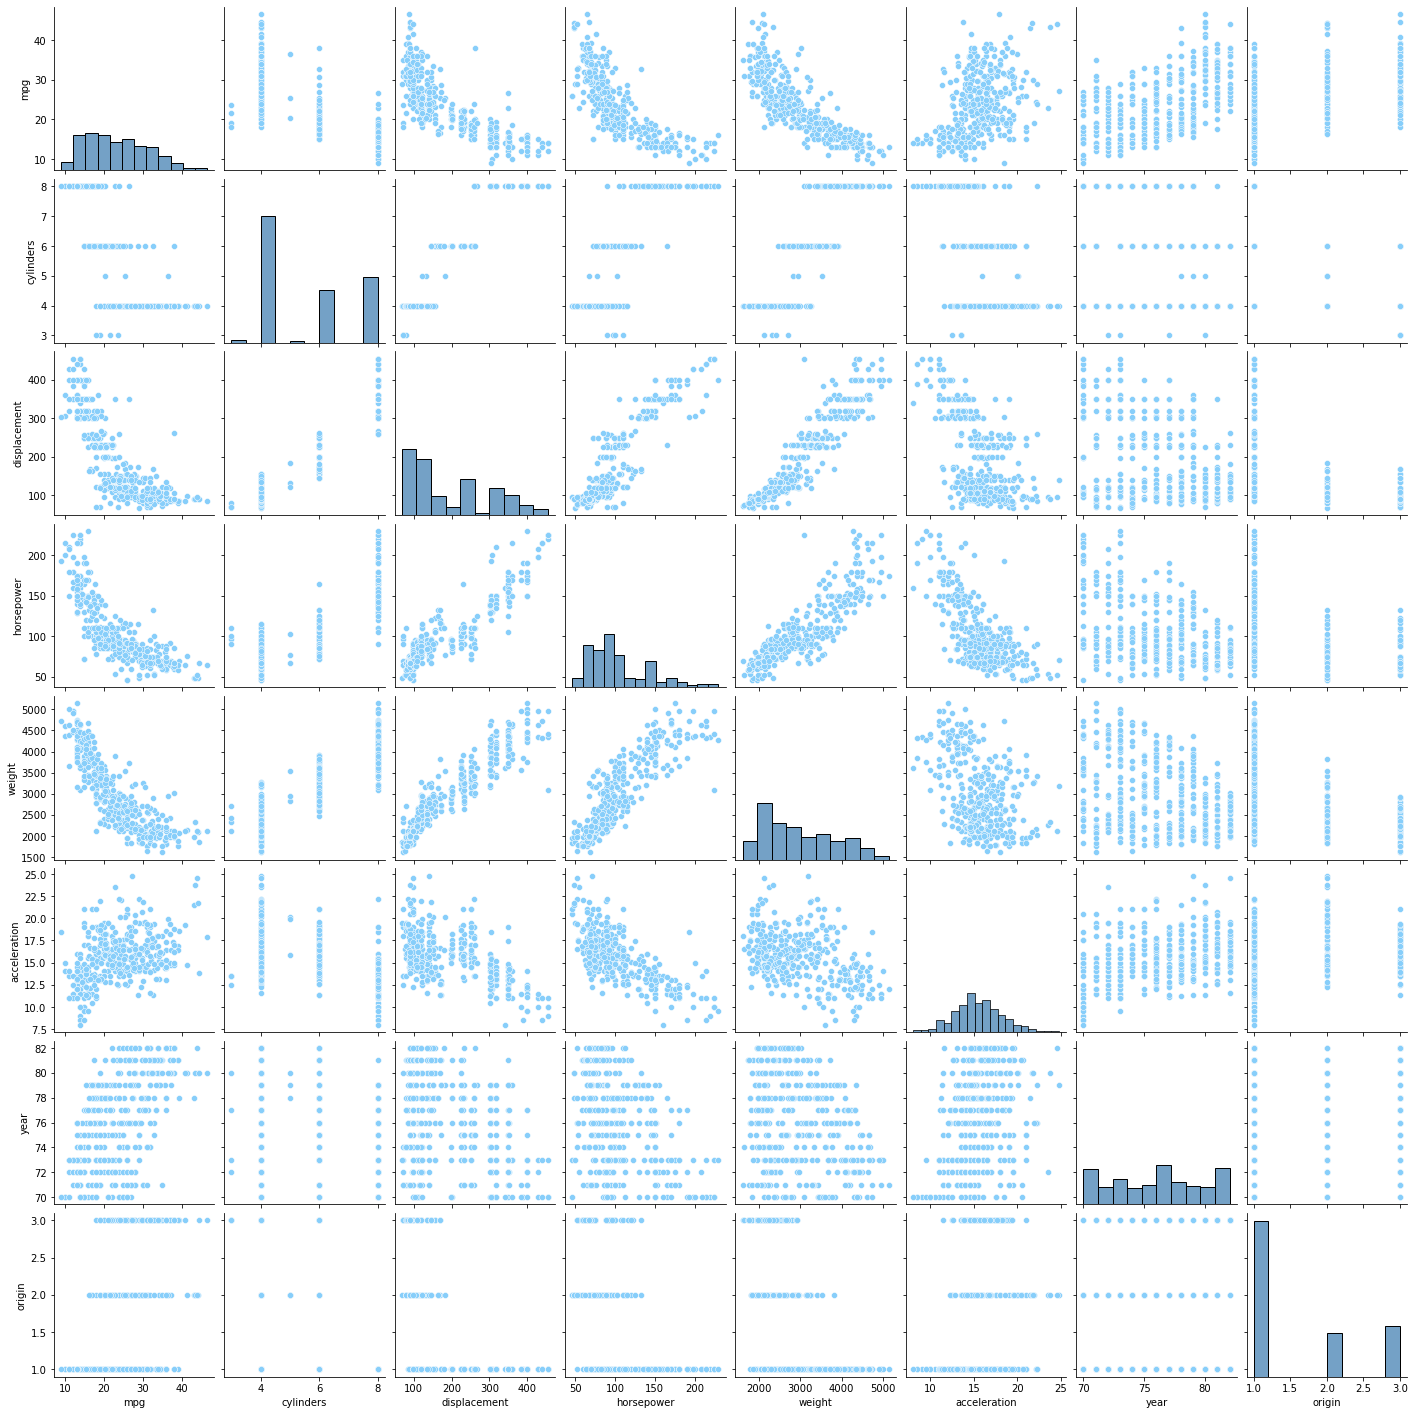

In [24]:
auto=ISLP.load_data('auto')
scatter_matrix=sns.pairplot(auto,diag_kws={'color':'steelblue'},plot_kws={'color':'lightskyblue'})
plt.show()

In [25]:
corr=auto.corr()
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [26]:
predictors=auto.iloc[:,1:8]
target=auto['mpg']
#Add the intercept
predictors=sm.add_constant(predictors)
model=sm.OLS(target,predictors)
result=model.fit()
#print(result.summary())
summarize(result)

,coef,std err,t,P>|t|
const,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


In [27]:
X1=auto['cylinders']
X2=auto['displacement']
X3=auto['horsepower']
X4=auto['weight']
X5=auto['acceleration']
X6=auto['year']
X7=auto['origin']
y=auto['mpg']
model_1=ols('y~X1+X2+X3+X4+X5+X6+X7',data=auto).fit()
anova_results=sm.stats.anova_lm(model_1,typ=2)
anova_results

,sum_sq,df,F,PR(>F)
X1,25.791491,1.0,2.329125,1.277965e-01
X2,77.612668,1.0,7.008884,8.444649e-03
X3,16.739754,1.0,1.511699,2.196328e-01
X4,1091.631693,1.0,98.580813,7.874953e-21
X5,7.358417,1.0,0.664509,4.154780e-01
X6,2402.249906,1.0,216.937408,3.055983e-39
X7,291.134494,1.0,26.291171,4.665681e-07
Residual,4252.212530,384.0,NaN,NaN


(c)(ii)We can use the p-values to determine which predictors appear to have a statistically significant relationship to the response. If the p-value is less than 0.01, we can believe that the variable has a statistically significant relationship with the response. Therefore, the variables 'displacement', 'weight', 'year' and 'origin' have a statistically significant relationship to the response.

(c)(iii)The coefficient for the year variable is 0.7508, which indicates that the year variable has a positive relationship with the response.

(d)We produce some of diagnostic plots of the linear regression fit, such as the residual plots and the leverage plot. Since residual plots can be used to identify outliers, we plot the studentized residuals and find the outliers while other observations have studentized residuals between -3 and 3. And from the leverage plot we can conclude that the red point is the observation with unusually high leverage.

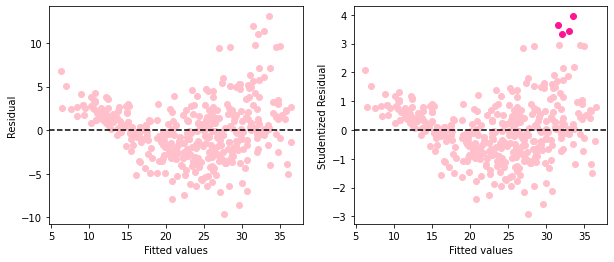

In [28]:
#outliers
#Residuals plot
fig,axes=plt.subplots(1,2,figsize=(10,4))
x=result.fittedvalues
y=result.resid
axes[0].scatter(x,y,marker='o',color='pink')
axes[0].set_xlabel('Fitted values')
axes[0].set_ylabel('Residual')
axes[0].axhline(0,c='k',ls='--')
##
#Studentized Residuals plot
x_2=result.fittedvalues
y_2=result.get_influence().resid_studentized_internal
#Find the possible outliers and mark outliers with the light color
outliers = [i for i, r in enumerate(y_2) if abs(r) > 3]
for i, r in enumerate(y_2):
    if i in outliers:
        plt.scatter(x_2[i], r, color='deeppink')
    else:
        plt.scatter(x_2[i], r, color='pink')
axes[1].set_xlabel('Fitted values')
axes[1].set_ylabel('Studentized Residual')
axes[1].axhline(0,c='k',ls='--');

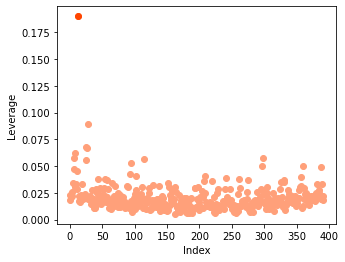

In [29]:
#Leverage plot
X=auto.iloc[:,1:8]
infl=result.get_influence()
ax=subplots(figsize=(5,4))[1]
ax.scatter(np.arange(X.shape[0]),infl.hat_matrix_diag,color='lightsalmon')
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
#Find the index of high leverage point and mark it with the light color
index=np.argmax(infl.hat_matrix_diag)
plt.scatter(index,max(infl.hat_matrix_diag),color='orangered');

(e)We can fit some models with interactions and determine whether any interactions appear to be statistically significant or not. After adding an interaction term between 'displacement' and 'acceleration', we find the p-value of this term is less than 0.01 and therefore the interaction is statistically significant.

In [30]:
X=MS(['cylinders','displacement','horsepower','weight',
      'acceleration','year','origin',('displacement','acceleration')]).fit_transform(auto)
y=auto['mpg']
model2=sm.OLS(y,X)
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,-30.0482,4.737,-6.343,0.000
cylinders,0.0021,0.312,0.007,0.995
displacement,0.0702,0.010,6.989,0.000
horsepower,-0.0551,0.014,-3.920,0.000
weight,-0.0042,0.001,-6.077,0.000
acceleration,0.7530,0.133,5.653,0.000
year,0.7722,0.048,16.051,0.000
origin,1.0573,0.267,3.958,0.000
displacement:acceleration,-0.0049,0.001,-7.058,0.000


(f)Considering some different transformations of the variables, we add the different terms to the model and examine whether new models perform well or not. 

In [31]:
X1=auto['cylinders']
X2=auto['displacement']
X3=auto['horsepower']
X4=auto['weight']
X5=auto['acceleration']
X6=auto['year']
X7=auto['origin']
y=auto['mpg']
#log(X)
X_log=np.log(X3)
X=np.column_stack((X1,X2,X3,X4,X5,X6,X7,X_log))
predictors=sm.add_constant(X)
model_1=sm.OLS(y,predictors)
result_1=model_1.fit()
summarize(result_1)

,coef,std err,t,P>|t|
const,86.7352,11.064,7.839,0.000
x1,-0.0553,0.291,-0.190,0.849
x2,-0.0046,0.007,-0.648,0.517
x3,0.1764,0.023,7.775,0.000
x4,-0.0034,0.001,-5.130,0.000
x5,-0.3277,0.097,-3.388,0.001
x6,0.7421,0.045,16.368,0.000
x7,0.8976,0.253,3.551,0.000
x8,-26.8545,2.652,-10.127,0.000


In [32]:
#sqrt(X)
X_sqrt=np.sqrt(X3)
X=np.column_stack((X1,X2,X3,X4,X5,X6,X7,X_sqrt))
predictors=sm.add_constant(X)
model_2=sm.OLS(y,predictors)
result_2=model_2.fit()
summarize(result_2)

,coef,std err,t,P>|t|
const,42.9901,7.251,5.929,0.000
x1,0.0604,0.293,0.206,0.837
x2,-0.0059,0.007,-0.820,0.413
x3,0.4239,0.045,9.353,0.000
x4,-0.0033,0.001,-4.975,0.000
x5,-0.3342,0.097,-3.443,0.001
x6,0.7398,0.045,16.308,0.000
x7,0.9159,0.253,3.626,0.000
x8,-10.5028,1.039,-10.104,0.000


In [33]:
#square(X)
X_square=np.square(X3)
X=np.column_stack((X1,X2,X3,X4,X5,X6,X7,X_square))
predictors=sm.add_constant(X)
model_3=sm.OLS(y,predictors)
result_3=model_3.fit()
summarize(result_3)

,coef,std err,t,P>|t|
const,1.3237,4.625,0.286,0.775
x1,0.3489,0.305,1.145,0.253
x2,-0.0076,0.007,-1.026,0.306
x3,-0.3195,0.034,-9.302,0.000
x4,-0.0033,0.001,-4.820,0.000
x5,-0.3306,0.099,-3.333,0.001
x6,0.7353,0.046,15.989,0.000
x7,1.0144,0.255,3.985,0.000
x8,0.0010,0.000,9.449,0.000


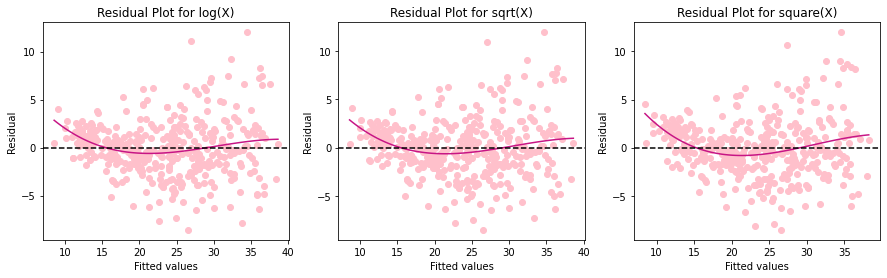

In [34]:
fig,axes=plt.subplots(1,3,figsize=(15,4))
x1=result_1.fittedvalues
y1=result_1.resid
axes[0].scatter(x1,y1,color='pink')
p1=np.polyfit(x1, y1,deg=3)
x_f=np.linspace(min(x1),max(x1),num=100)
y_f=np.polyval(p1,x_f)
axes[0].plot(x_f,y_f,color='mediumvioletred')
axes[0].set_xlabel('Fitted values')
axes[0].set_ylabel('Residual')
axes[0].set_title('Residual Plot for log(X)')
axes[0].axhline(0,c='k',ls='--')
##
x2=result_2.fittedvalues
y2=result_2.resid
axes[1].scatter(x2,y2,color='pink')
p2=np.polyfit(x2, y2,deg=3)
x_f=np.linspace(min(x2),max(x2),num=100)
y_f=np.polyval(p2,x_f)
axes[1].plot(x_f,y_f,color='mediumvioletred')
axes[1].set_xlabel('Fitted values')
axes[1].set_ylabel('Residual')
axes[1].set_title('Residual Plot for sqrt(X)')
axes[1].axhline(0,c='k',ls='--')
##
x3=result_3.fittedvalues
y3=result_3.resid
axes[2].scatter(x3,y3,color='pink')
p3=np.polyfit(x3, y3,deg=3)
x_f=np.linspace(min(x3),max(x3),num=100)
y_f=np.polyval(p3,x_f)
axes[2].plot(x_f,y_f,color='mediumvioletred')
axes[2].set_xlabel('Fitted values')
axes[2].set_ylabel('Residual')
axes[2].set_title('Residual Plot for square(X)')
axes[2].axhline(0,c='k',ls='--');

In [35]:
sm.stats.anova_lm(result,result_1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,384.0,4252.212530,0.0,NaN,NaN,NaN
1,383.0,3354.026788,1.0,898.185743,102.564816,1.621029e-21


In [36]:
sm.stats.anova_lm(result,result_2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,384.0,4252.212530,0.0,NaN,NaN,NaN
1,383.0,3357.260575,1.0,894.951956,102.097109,1.953003e-21


In [37]:
sm.stats.anova_lm(result,result_3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,384.0,4252.212530,0.0,NaN,NaN,NaN
1,383.0,3448.367774,1.0,803.844756,89.280657,3.469776e-19


Therefore, from the information mentioned above, we can conclude that log(horsepower), sqrt(horsepower) and square(horsepower) terms are statistically significant in the new multiple linear regression models.

### Additional coding task

In [38]:
def lm(Xtrain,Xtest,y):
    regression_model=LinearRegression()
    regression_model.fit(Xtrain,y)
    y_pred=regression_model.predict(Xtest)
    return y_pred

In [39]:
def knn(Xtrain,Xtest,y,n):
    regressor=KNeighborsRegressor(n_neighbors=n)
    regressor.fit(Xtrain,y)
    y_pred=regressor.predict(Xtest)
    return y_pred

In [40]:
#Generate the dataset
ntrain=50
ntest=500
rep_times=100
puse=[1,2,3,4,10,20]
k=np.arange(1,10)
Xtrain=[np.random.normal(loc=0,scale=0.5,size=(ntrain,i)) for i in puse]
Xtest=[np.random.normal(loc=0,scale=0.5,size=(ntest,i)) for i in puse]
out_knn=pd.DataFrame()
out_lm=pd.DataFrame()

In [41]:
for i in np.arange(0,len(puse)):
    X_train=Xtrain[i]
    X_test=Xtest[i]
    y0=np.sin(2*X_train[:,0])
    ytest=np.sin(2*X_test[:,0])
    yhat_lm=np.zeros((ntest,rep_times))
    yhat_knn=np.zeros((ntest,rep_times,len(k)))
    for l in np.arange(0,rep_times):
        #Add the noise to the y0 and obtain the true values
        y=y0+np.random.normal(0,0.5,ntrain)
        yhat_lm[:,[l]]=lm(X_train,X_test,y).reshape(-1,1)
        for j in np.arange(0,len(k)):
            yhat_knn[:,l,j]=knn(X_train,X_test,y,k[j])
    #Compute mean of predicted values
    ybar_lm=np.mean(yhat_lm,axis=1,keepdims=True)
    #Compute bias^2
    biasSQ_lm=np.mean(np.square(ytest-ybar_lm))
    #Compute variance
    variance_lm=np.mean(np.var(yhat_lm,axis=1,ddof=1))
    #Compute total MSE
    err_lm =biasSQ_lm+variance_lm
    out_lm = out_lm.append(pd.DataFrame({'error': [biasSQ_lm], 'component': ['squared-bias'], 'p': [f"p = {puse[i]}"]}))
    out_lm = out_lm.append(pd.DataFrame({'error': [variance_lm], 'component': ['variance'], 'p': [f"p = {puse[i]}"]}))
    out_lm = out_lm.append(pd.DataFrame({'error': [err_lm], 'component': ['MSE'], 'p': [f"p = {puse[i]}"]}))
    # Compute mean of predicted values
    ybar_knn_1=np.mean(yhat_knn[:,:,0],axis=1,keepdims=True)
    ybar_knn_2=np.mean(yhat_knn[:,:,1],axis=1,keepdims=True)
    ybar_knn_3=np.mean(yhat_knn[:,:,2],axis=1,keepdims=True)
    ybar_knn_4=np.mean(yhat_knn[:,:,3],axis=1,keepdims=True)
    ybar_knn_5=np.mean(yhat_knn[:,:,4],axis=1,keepdims=True)
    ybar_knn_6=np.mean(yhat_knn[:,:,5],axis=1,keepdims=True)
    ybar_knn_7=np.mean(yhat_knn[:,:,6],axis=1,keepdims=True)
    ybar_knn_8=np.mean(yhat_knn[:,:,7],axis=1,keepdims=True)
    ybar_knn_9=np.mean(yhat_knn[:,:,8],axis=1,keepdims=True)
    # Compute bias^2
    biasSQ_knn_1=np.mean(np.square(ytest-ybar_knn_1))
    biasSQ_knn_2=np.mean(np.square(ytest-ybar_knn_2))
    biasSQ_knn_3=np.mean(np.square(ytest-ybar_knn_3))
    biasSQ_knn_4=np.mean(np.square(ytest-ybar_knn_4))
    biasSQ_knn_5=np.mean(np.square(ytest-ybar_knn_5))
    biasSQ_knn_6=np.mean(np.square(ytest-ybar_knn_6))
    biasSQ_knn_7=np.mean(np.square(ytest-ybar_knn_7))
    biasSQ_knn_8=np.mean(np.square(ytest-ybar_knn_8))
    biasSQ_knn_9=np.mean(np.square(ytest-ybar_knn_9))
    biasSQ_knn = np.array([biasSQ_knn_1, biasSQ_knn_2, biasSQ_knn_3, biasSQ_knn_4, biasSQ_knn_5, biasSQ_knn_6, biasSQ_knn_7, biasSQ_knn_8, biasSQ_knn_9])
    # Compute variance
    variance_knn_1=np.mean(np.var(yhat_knn[:,:,0],axis=1,ddof=1))
    variance_knn_2=np.mean(np.var(yhat_knn[:,:,1],axis=1,ddof=1))
    variance_knn_3=np.mean(np.var(yhat_knn[:,:,2],axis=1,ddof=1))
    variance_knn_4=np.mean(np.var(yhat_knn[:,:,3],axis=1,ddof=1))
    variance_knn_5=np.mean(np.var(yhat_knn[:,:,4],axis=1,ddof=1))
    variance_knn_6=np.mean(np.var(yhat_knn[:,:,5],axis=1,ddof=1))
    variance_knn_7=np.mean(np.var(yhat_knn[:,:,6],axis=1,ddof=1))
    variance_knn_8=np.mean(np.var(yhat_knn[:,:,7],axis=1,ddof=1))
    variance_knn_9=np.mean(np.var(yhat_knn[:,:,8],axis=1,ddof=1))
    variance_knn = np.array([variance_knn_1,variance_knn_2, variance_knn_3,variance_knn_4,variance_knn_5,variance_knn_6,variance_knn_7,variance_knn_8,variance_knn_9])
    # Compute total MSE
    err_knn =biasSQ_knn+variance_knn
    out_knn = out_knn.append(pd.DataFrame({'error': biasSQ_knn, 'component': ['squared-bias'] * len(k), 'K': 1 / np.array(k),'p': [f"p = {puse[i]}"] * len(k)}))
    out_knn = out_knn.append(pd.DataFrame({'error': variance_knn, 'component': ['variance'] * len(k), 'K': 1 / np.array(k), 'p': [f"p = {puse[i]}"] * len(k)}))
    out_knn = out_knn.append(pd.DataFrame({'error': err_knn, 'component': ['MSE'] * len(k), 'K': 1 / np.array(k),'p': [f"p = {puse[i]}"] * len(k)}))

In [42]:
out_lm

,error,component,p
0,0.952855,squared-bias,p = 1
0,0.013781,variance,p = 1
0,0.966637,MSE,p = 1
0,0.862824,squared-bias,p = 2
0,0.014888,variance,p = 2
0,0.877712,MSE,p = 2
0,0.675279,squared-bias,p = 3
0,0.025721,variance,p = 3
0,0.701001,MSE,p = 3
0,0.899624,squared-bias,p = 4


In [43]:
out_knn

,error,component,K,p
0,0.891033,squared-bias,1.000000,p = 1
1,0.888423,squared-bias,0.500000,p = 1
2,0.884448,squared-bias,0.333333,p = 1
3,0.872554,squared-bias,0.250000,p = 1
4,0.862250,squared-bias,0.200000,p = 1
...,...,...,...,...
4,0.625348,MSE,0.200000,p = 20
5,0.600542,MSE,0.166667,p = 20
6,0.578143,MSE,0.142857,p = 20
7,0.564164,MSE,0.125000,p = 20


In [44]:
data_lm=out_lm[out_lm['component']=='MSE']
data_lm

,error,component,p
0,0.966637,MSE,p = 1
0,0.877712,MSE,p = 2
0,0.701001,MSE,p = 3
0,0.924199,MSE,p = 4
0,0.873887,MSE,p = 10
0,1.068606,MSE,p = 20


In [45]:
data_knn=out_knn[out_knn['component']=='MSE']
data_knn

,error,component,K,p
0,1.144756,MSE,1.000000,p = 1
1,1.013984,MSE,0.500000,p = 1
2,0.967520,MSE,0.333333,p = 1
3,0.935267,MSE,0.250000,p = 1
4,0.913690,MSE,0.200000,p = 1
5,0.895545,MSE,0.166667,p = 1
6,0.880978,MSE,0.142857,p = 1
7,0.870752,MSE,0.125000,p = 1
8,0.859605,MSE,0.111111,p = 1
0,1.101227,MSE,1.000000,p = 2


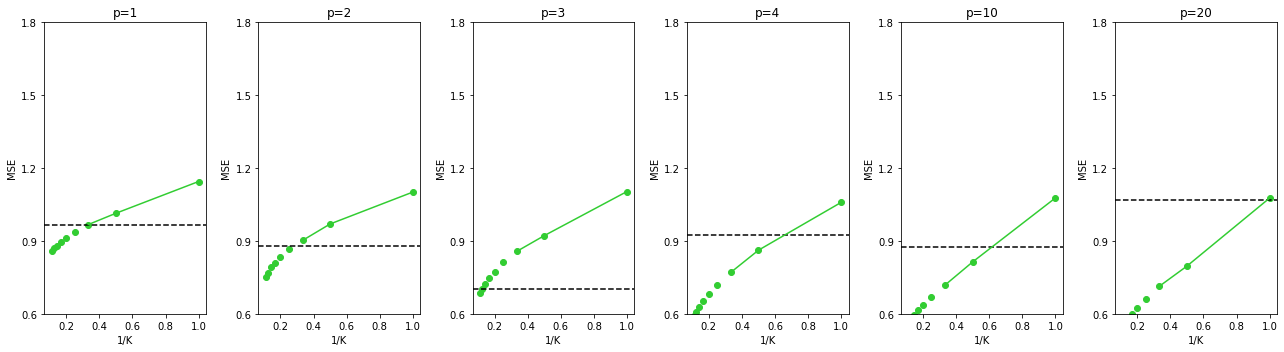

In [46]:
p=np.array([1,2,3,4,10,20])
fig,axes=plt.subplots(1,6,figsize=(18,5))
for i, ax in enumerate(axes.flat):
    ax.axhline(data_lm.iloc[i,0],color='black',linestyle='--')
    sorted_data=data_knn[data_knn['p']==data_lm.iloc[i,2]]
    ax.scatter(sorted_data['K'],sorted_data['error'],color='limegreen')
    for j in range(2):
        ax.plot(sorted_data['K'].iloc[j:j+2],sorted_data['error'].iloc[j:j+2], color='limegreen')
    ax.set_xlabel('1/K')
    ax.set_ylabel('MSE')
    ax.set_title('p={}'.format(p[i]))
    ax.set_ylim(0.6, 1.8)
    ax.set_yticks([0.6, 0.9, 1.2, 1.5, 1.8])
plt.tight_layout()
plt.show()